# Giriş
Tensorflow 2 öğrenme serüvenimize kaldığımız yerden devam ediyoruz. Bu çalışma [tutorial](https://www.tensorflow.org/tutorials?authuser=1) beginner kısmında bulunan basic classification: classify images of clothing kısmında kodları inceleyeceğiz. Çalışma kıyafet resimlerini sınıflandırma üzerine olacaktır.

In [ ]:
# Kütüphanelerin çalışma ortamına entegrasyonu
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


**Veri Seti**<br>
- Veri seti olarak Fashion MNIST veri seti kullanacağız. 70 bin gri formatta 28x28 boyutunda 10 sınıflı resim verilerenden oluşmaktadır.
- Veri setinin 60 bin verisini train(eğitim), 10 verisini test olarak kullanacağız.
- Veri seti tensorflow içerisindeki keras kütüphanesinin içerisindeki veri setleridir.

In [ ]:
fasihion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels) , (test_images, test_labels) = fasihion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


- Söylediğim gibi veriler 28x28 boyutunda gri formatta veri tipleridir. Her bir piksel 0-255 arasındaki değerlerden oluşur.
- Veri setinin içerisinde olan sınıflar:
  - 0 : T-shirt/top
  - 1 : Trouser
  - 2 : Pullover
  - 3 : Dress
  - 4 : Coat
  - 5 : Sandal
  - 6 : Shirt
  - 7 : Sneaker
  - 8 : Bag
  - 9 : Ankle boot

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# 60000 resim, 28x28 boyut
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
# Integer formatta olan sınıflar verisi
train_labels[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

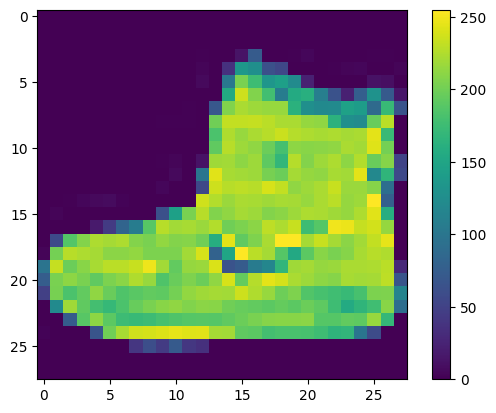

In [ ]:
# Veri seti içerisindeki bir resimi görselleştirelim
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Arkadaşlar size gri formatta dedim ama yukarıdaki görüntü hiçte gri formatta gibi durmuyor ondan dolayı bir açıklama yapmak istedim. Gri formatlı resimler tek katmandan oluşur ve bu katpman 0-255 arasında değerlerden oluşur bizim veri setindeki resimimizde tek katmandan oluşan bir veridir. Birde üç katmalı resimler var bunlar gerçek hayattan alınan resimler ve bu resimler kırmızı, yeşil, mavi katmanlarından oluşur ve bu her kayman yine 0-255 arasında değerlere sahip olur. İlerleyen çalışmalarda bu konuya yine değineceğiz ama şimdilik çalışmamıza devam edelim.

In [ ]:
# 0-255 değerlerine sahip olan her pikseli 0-1 arasında indirgiyoruz!
train_images = train_images / 255.0
test_images = test_images / 255.0

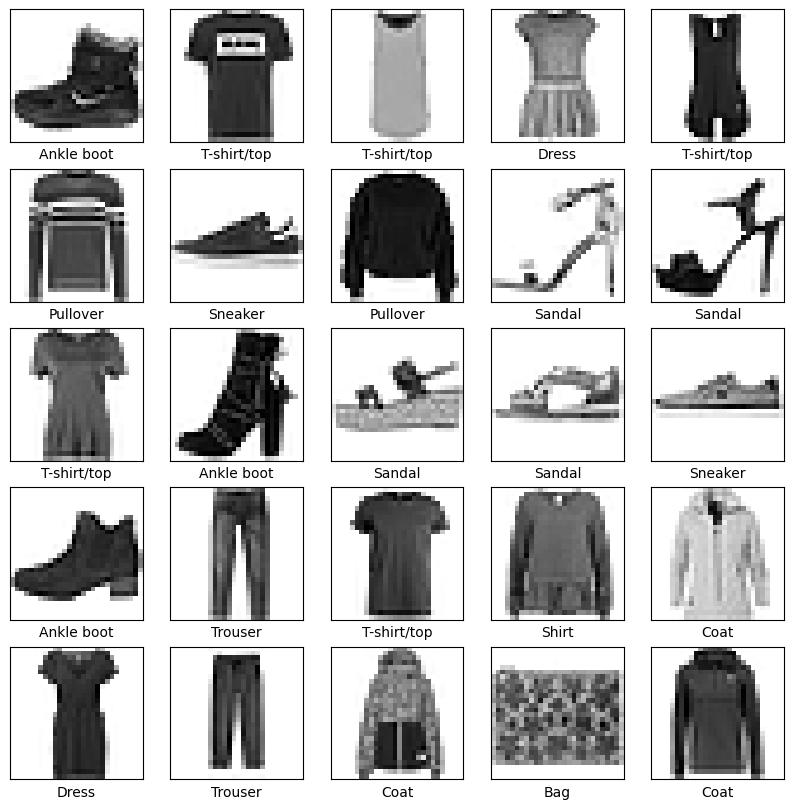

In [ ]:
# Veri seti içerisindeki ilk 25 verinin görselleştirilmesi
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

**Modelin oluşturulması**<br>
Bu bölümde modelimizi oluşturacağız ve modelin içeriğine kısca değineceğim.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # input_shape, veri seti içerisindeki verilerin boyutu
    tf.keras.layers.Dense(128, activation = "relu"), # 128 nöron(birim)lu relu activasyon fonksiyonuna sahip sinir ağı katmanı
    tf.keras.layers.Dense(10) # 10 nöronlu son sinir ağı katmanı, 10 nörona sahip olmasının sebebi sınıf sayımızın 10 olmasından dolayıdır.
])

**tf.keras.Sequential**<br>
- Bu katman sıralı bir şekilde eklendiği bir model oluşturur.
- "Sequential" model, basit ve düz yapıda modeller için kullanılır.
**Flatten**<br>
- Bu katman çok boyutlu bir girişi tek boyutlu bir vektöre dönüştürür.
- Örneğin, 28x28 piksel boyutunda bir görüntüyü 784 elemanlı (28*28 = 784) bir veköre dönüştürür.
**Dense**<br>
- Tam bağlantı katmanı(Full connected layer) olarakta bilinir.
- Bu katman, her bir nöronun bir önceki katmandaki tüm nöronlarla bağlantılı olduğu bir katmandır.

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

**model.compile**<br>
- Modelin nasıl derleneceğini belirtir. Bu modelin eğitim sürecinde hangi optimizer, loss foction, metrics kullanılacağı belirtilir.

**adam**<br>
- optimizer algoritması. (Adaptive Moment Estimation)
- Adam, öğrenme sürecinde adaptif öğrenme oranı kullanarak modelin daha hızlı ve etkili bir şekilde eğitilmesini sağlar.

**tf.keras.losses.SparseCategoricalCrossentropy**<br>
- Bir kayıp fonksiyonu çok sınıflı sınıflandırma prblemleri için kullanılır.
- "SparseCategoricalCrossentropy", etiketlerin tamsayı(integer) formatında olduğu durumlar için kullanılır.
- "from_logits = True", modelin son katmanındagelen çıktılar logit(ham tahminler) şeklinde ise bu parametre "True" olarak ayarlanır.

**metrics = ["accuracy"]**<br>
- Eğitim ve değerlendirme sırasında izlenecek metrik olarak doğruluk (accuracy) kullanılır.

**Modelin eğitilmesi**<br>
Bu bölümde hazırladığımız modeli veri setimiz ile eğiteceğiz.

In [ ]:
"""
train_images : resimlerin buluntuğu eğitim veri kümesi
train_labels : resimlerin sınıflarının bulunduğu eğitim kümesi
epochs : eğitimin kaç adım olacağının belirtildiği kısım
"""
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4922 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3714 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3348 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3124 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2928 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2800 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2665 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2560 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2483 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.238

In [ ]:
# Eğitim test verisi ile değerlendirilmesi
"""
test_images : Resimlerden oluşan veri kümesi
test_labels : Her resimin sınıf değerlerinin oldğu veri kümesi
verbose : Bu parametre, değerlendirme işlemi sırasında ne kadar bilgi yazdırılacağını belirler.
"""
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("\nTest Accuracy:", test_acc)

313/313 - 2s - loss: 0.3488 - accuracy: 0.8778 - 2s/epoch - 6ms/step

Test Accuracy: 0.8777999877929688


Sonuçlar değerlendirecek olur isem, test veri seti ile yapılan değerlendirmede accuracy değerimiz 0.87 çıkmışır. Eğitim veri seti ile yapılan değerlendirme ise bu değeri eğitimin son adımındaki accuracy değerini alarak yapıyorum, 0.91 çıkmıştır. Değerlerin birbirine yakın olması güzel ama eğitim veri kümesi ile yapılan değerlendirme sonucunun yüksek çıkması model için kötü bir sonuçtur çünkü bu durum Overfitting(aşırı öğrenme) anlamına gelmektedir. Eğer test veri kümesi ile yapılan değerlendirme fazla olsaydı modelimiz iyi bir şekilde öğrenmiş diyebilirdik.

**Nedir bu Overfitting ?**<br>
Overfitting, bir makine öğrenimi modelinin eğitim verisine çok iyi uyum sağlaması, ancak yeni, görülmemiş veriler üzerinde kötü performans göstermesi durumudur. Bu, modelin eğitim verisindeki gürültü ve rastlantısal desenleri öğrenmesi nedeniyle olur.

**Overfitting'in Önlenmesi:**<br>
- **Daha Fazla Veri Toplamak:** Daha fazla eğitim verisi kullanmak modelin genelleme yeteneğini artırabilir.
- **Düzenlileştirme (Regularization):** L1 veya L2 regularizasyonu gibi yöntemler kullanarak modelin kompleksliğini sınırlamak.
- **Erken Durdurma (Early Stopping):** Modelin performansı doğrulama seti üzerinde kötüleşmeye başladığında eğitimi durdurmak.
- **Veri Artırma (Data Augmentation):** Eğitim verisini çeşitli yöntemlerle artırarak modelin daha çeşitli verilerle eğitilmesini sağlamak.
- **Model Basitleştirme:** Modelin karmaşıklığını azaltarak daha basit ve genelleyici bir model elde etmek.

In [ ]:
# Modelimiz ile tahmin yapalım
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) # Tahmin için modelimize Softmax activasyon foksiyonlu son bir katman ekliyoruz!

**tf.keras.layers.Softmax()**<br>
- Bu, sınıflandırma problemlerinde sıkça kullanılan bir aktivasyon fonksiyonudur.
- Softmax fonksiyonu, modelin çıktılarını olasılık dağılımına dönüştürür. Yani, çıktı değerlerini [0, 1] aralığında ve toplamı 1 olan bir olasılık dağılımına çevirir.
- Bu, modelin son çıktılarına softmax fonksiyonunu uygular ve böylece her bir sınıf için tahmini olasılık değerlerini elde ederiz.

In [ ]:
"""
test_images içerisindeki her bir resim için eğittiğimiz modeli kullanarak tahmin yapıyoruz!
"""
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
"""
test_images içerisindeki il resimin tahmin sonuçları,
- 10 adet tahmin sonucu her bir sınıf için yapılan tahmin sonucudur.
"""
predictions[0]

array([5.3427471e-09, 5.8277734e-09, 4.1069981e-08, 8.5147189e-10,
       1.0133824e-08, 1.3627575e-03, 4.7427765e-08, 2.1630704e-02,
       3.7061992e-07, 9.7700602e-01], dtype=float32)

In [ ]:
# 9 numaralı sınıfın sonucu daha yüksek çıktığını göstermektedir.
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

test_label[0] değerinin 9 çıkması modelimizin doğru tahmin ettiğini göstermektedir.

In [ ]:
"""
plot_image :  tahmin edilecek resmi çizdirir.
plot_value_array : tahmin edilecek resmin 10 sınıflık sonucunu bar tablosu olarak görselleştirir.
"""

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color = color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")

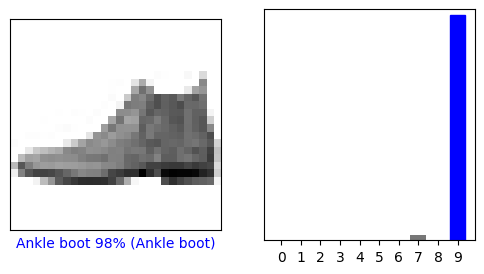

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

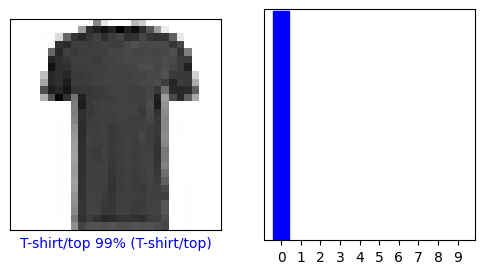

In [ ]:
i = 88
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

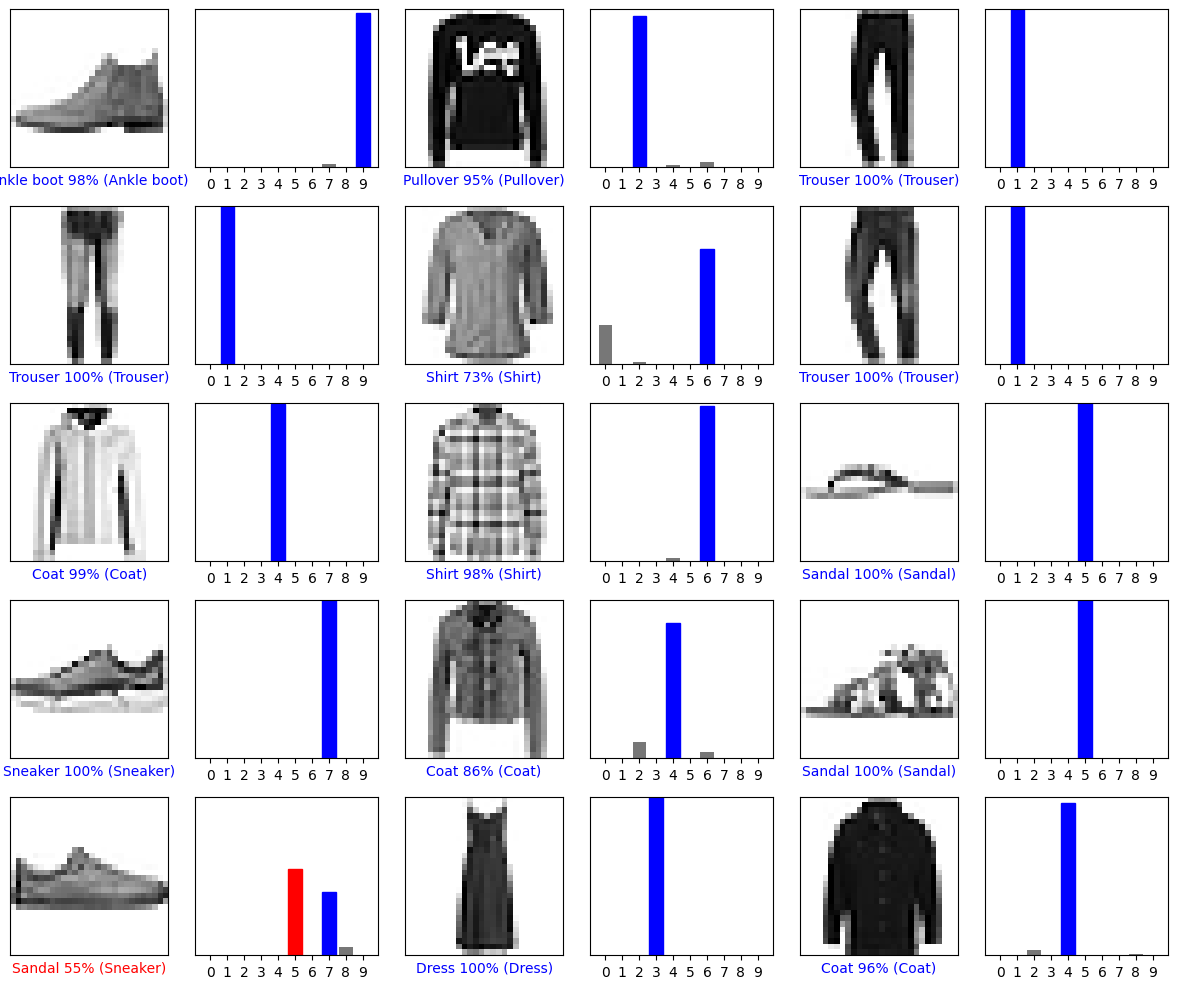

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Sonuç
Tensorflow 2 üzerindeki çalışmamızın üçüncü çalışmasınıda bitirmiş bulunmaktayız. Bu çalışmamız fashion mnist veri seti içerisindeki kıyafet verilerinin hazırladığımız model ile sınıflandırma işlemi gerçekleştirdik. Umarım bu çalışma sizler için faydalı olmuştur. Yeni çalışmalarda görüşmek üzere.

Aşağıdaki Linklerden beni takip edebilir ve yapacağım çalışmalardan haberdar olabilirsiniz!<br>
[Linkedin](https://www.linkedin.com/in/ihsancenkiz/)<br>
[Github](https://github.com/ihsncnkz)<br>
[Kaggle](https://www.kaggle.com/ihsncnkz)